# 用sklearn库的PCA降维和KNN算法实现手写数据识别

In [ ]:
import scipy.io as scio
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

mnist = scio.loadmat('D:\\data\\develop\\ml\\ai-learn\\mnist-original.mat')
mnist

## 数据读入及简单测试

In [4]:
mnist_data = np.array(mnist['data']).transpose()
mnist_label = np.array(mnist['label']).transpose()
print(mnist_train.shape, mnist_label.shape)

(70000, 784) (70000, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, test_size=0.2, random_state=666, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56000, 784) (14000, 784) (56000, 1) (14000, 1)


[7.]


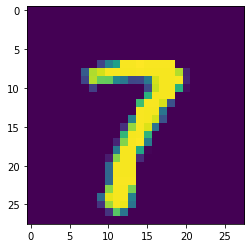

In [6]:
print(y_train[0])
plt.imshow(X_train[0].reshape(28, 28))
plt.show()

## PCA降维

In [ ]:
%%time
from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(X_train)

In [ ]:
X_train_reduction = pca.transform(X_train)
X_train_reduction.shape

In [ ]:
X_test_reduction = pca.transform(X_test)
X_test_reduction.shape

## KNN预测

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
%time knn.fit(X_train_reduction, y_train.reshape((-1)))

In [ ]:
%time knn.score(X_test_reduction, y_test)

## 对比直接用原始数据进行KNN识别

In [ ]:
knn_origin = KNeighborsClassifier()
%time knn_origin.fit(X_train, y_train.reshape(-1))

In [ ]:
%time knn_origin.score(X_test, y_test.reshape(-1))

我们能看到，先用PCA降维，然后再用KNN识别的方式能大幅度提高运算速率，也能提高准确度。这说明了PCA所削减的部分，很多是与噪音信息有关。

Wall time: 3.7 s


PCA(n_components=0.9)

In [10]:
X_train_reduction = pca.transform(X_train)
X_train_reduction.shape

(56000, 87)

In [12]:
X_test_reduction = pca.transform(X_test)
X_test_reduction.shape

(14000, 87)

## KNN预测

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
%time knn.fit(X_train_reduction, y_train.reshape((-1)))

Wall time: 1.24 s


KNeighborsClassifier()

In [15]:
%time knn.score(X_test_reduction, y_test)

Wall time: 1min 26s


0.9755714285714285

## 对比直接用原始数据进行KNN识别

In [16]:
knn_origin = KNeighborsClassifier()
%time knn_origin.fit(X_train, y_train.reshape(-1))

Wall time: 24.1 s


KNeighborsClassifier()

In [20]:
%time knn_origin.score(X_test, y_test.reshape(-1))

Wall time: 13min 53s


0.9716428571428571

我们能看到，先用PCA降维，然后再用KNN识别的方式能大幅度提高运算速率，也能提高准确度。这说明了PCA所削减的部分，很多是与噪音信息有关。